<a href="https://colab.research.google.com/github/HansHenseler/masdav2022/blob/main/Part_3_Exercise_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plaso super timeline exercises and explanations

Part 3

Master of Advanced Studies in Digital Forensics & Cyber Investigation

Data Analytics and Visualization for Digital Forensics

(c) Hans Henseler, 2022


# Part 3


## 1 Installing plaso tools in the colab notebook

In [ ]:
# various install steps to install plaso tools and dependencies to get plaso working in colab
# -y option is to skip user interaction
# some packages need to be deinstalled and reinstalled to resolve dependencies
# these steps take app. 3 minutes to complete on a fresh colab instance
!add-apt-repository -y ppa:gift/stable
!apt update
!apt-get update
!apt install plaso-tools
!pip uninstall -y pytsk3
!pip install pytsk3
!pip uninstall -y yara-python
!pip install yara-python
!pip uninstall -y lz4
!pip install lz4

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 http://ppa.launchpad.net/gift/stable/ubuntu bionic InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:13 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Reading packa

In [ ]:
!python --version

Python 3.7.13


In [ ]:
# check is plasoo tools were installed by running psort.py. Use -h to get help
!psort.py 

2022-08-05 12:06:36,932 [INFO] (MainProcess) PID:14359 <data_location> Determined data location: /usr/share/plaso
ERROR: Output format: dynamic requires an output file

usage: psort.py [-h] [--troubles] [-V] [--analysis PLUGIN_LIST]
                [--process_memory_limit SIZE]
                [--temporary_directory DIRECTORY] [--worker_memory_limit SIZE]
                [--worker_timeout MINUTES] [--logfile FILENAME] [-d] [-q] [-u]
                [--status_view TYPE] [--slice DATE_TIME]
                [--slice_size SLICE_SIZE] [--slicer] [--data PATH] [-a]
                [--language LANGUAGE_TAG] [--dynamic_time]
                [--output_time_zone TIME_ZONE] [-o FORMAT] [-w OUTPUT_FILE]
                [--fields FIELDS] [--additional_fields ADDITIONAL_FIELDS]
                [--profilers PROFILERS_LIST] [--profiling_directory DIRECTORY]
                [--profiling_sample_rate SAMPLE_RATE]
                [PATH] [FILTER]


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
plaso_file = 'gdrive/MyDrive/mus2019ctf.plaso'

Mounted at /content/gdrive


# Exercises

## 1 Timeline explorer

In [ ]:
# Create a l2tcsv csv file for mus2019ctf and download it to your computer
# we can use timeline explorer to load this format 
#
!psort.py --status_view none -o l2tcsv $plaso_file -w mus2019_l2tcsv.csv
#
# download timeline explorer from https://ericzimmerman.github.io/#!index.md

2022-08-05 12:07:00,588 [INFO] (MainProcess) PID:14533 <data_location> Determined data location: /usr/share/plaso
only date and time values and/or a limited predefined set of output fields. It
is strongly recommend to use an alternative output format like: dynamic.

Waiting for 15 second to give you time to cancel.

Processing completed.


## 2 Colorized Super Timeline Template for Log2timeline Output Files

In [ ]:
# In 2012 Rob Lee from SANS released an Excel Timeline Template to be used to automatically colorize your timelines.
# try this procedure on one of the l2tcsv exports that you have created earlier. Follow the instructions here":
#
# https://www.sans.org/blog/digital-forensic-sifting-colorized-super-timeline-template-for-log2timeline-output-files/

## 3 Load csv data from psort.py in a dataframe and visualise the data

In [ ]:
# 3a load the csv file that you created in exercise 1 

import pandas as pd
df = pd.read_csv("mus2019_l2tcsv.csv")
df

,date,time,timezone,MACB,source,sourcetype,type,user,host,short,desc,version,filename,inode,notes,format,extra
0,00/00/0000,--:--:--,-,....,WEBHIST,MSIE WebCache container record,Expiration Time,-,DESKTOP-0QT8017,URL: https://wbd.ms/windows-app-web-link,URL: https://wbd.ms/windows-app-web-link Acces...,2,NTFS:\Users\Administrator\AppData\Local\Micros...,89403,-,esedb/msie_webcache,sha256_hash: 90495802063637f718636ad4863ce74ce...
1,00/00/0000,--:--:--,-,....,REG,AppCompatCache Registry Entry,File Last Modification Time,-,DESKTOP-0QT8017,Path: 00000009\t3e812ca14e7e0000\t000a00004563...,[HKEY_LOCAL_MACHINE\System\ControlSet001\Contr...,2,NTFS:\Windows\System32\config\SYSTEM,83339,-,winreg/appcompatcache,sha256_hash: df2d4fd6eed8a025632be22f0cda1a821...
2,00/00/0000,--:--:--,-,....,REG,AppCompatCache Registry Entry,File Last Modification Time,-,DESKTOP-0QT8017,Path: 00000009\t000e002800460000\t000a000042ee...,[HKEY_LOCAL_MACHINE\System\ControlSet001\Contr...,2,NTFS:\Windows\System32\config\SYSTEM,83339,-,winreg/appcompatcache,sha256_hash: df2d4fd6eed8a025632be22f0cda1a821...
3,00/00/0000,--:--:--,-,....,REG,AppCompatCache Registry Entry,File Last Modification Time,-,DESKTOP-0QT8017,Path: 00000009\t000100330a160000\t000a00004563...,[HKEY_LOCAL_MACHINE\System\ControlSet001\Contr...,2,NTFS:\Windows\System32\config\SYSTEM,83339,-,winreg/appcompatcache,sha256_hash: df2d4fd6eed8a025632be22f0cda1a821...
4,00/00/0000,--:--:--,-,....,REG,AppCompatCache Registry Entry,File Last Modification Time,-,DESKTOP-0QT8017,Path: 00000009\t000a0714273b0000\t000a00004563...,[HKEY_LOCAL_MACHINE\System\ControlSet001\Contr...,2,NTFS:\Windows\System32\config\SYSTEM,83339,-,winreg/appcompatcache,sha256_hash: df2d4fd6eed8a025632be22f0cda1a821...


In [ ]:
# date and time are separate columns. Create a new datetime column that combines these two:

import datetime as dt
df['datetime'] = df['date'] + 'T' + df['time']
df['datetime'] = pd.to_datetime(df['datetime'],errors='coerce')
df


,date,time,timezone,MACB,source,sourcetype,type,user,host,short,desc,version,filename,inode,notes,format,extra,datetime
0,00/00/0000,--:--:--,-,....,WEBHIST,MSIE WebCache container record,Expiration Time,-,DESKTOP-0QT8017,URL: https://wbd.ms/windows-app-web-link,URL: https://wbd.ms/windows-app-web-link Acces...,2,NTFS:\Users\Administrator\AppData\Local\Micros...,89403,-,esedb/msie_webcache,sha256_hash: 90495802063637f718636ad4863ce74ce...,NaT
1,00/00/0000,--:--:--,-,....,REG,AppCompatCache Registry Entry,File Last Modification Time,-,DESKTOP-0QT8017,Path: 00000009\t3e812ca14e7e0000\t000a00004563...,[HKEY_LOCAL_MACHINE\System\ControlSet001\Contr...,2,NTFS:\Windows\System32\config\SYSTEM,83339,-,winreg/appcompatcache,sha256_hash: df2d4fd6eed8a025632be22f0cda1a821...,NaT
2,00/00/0000,--:--:--,-,....,REG,AppCompatCache Registry Entry,File Last Modification Time,-,DESKTOP-0QT8017,Path: 00000009\t000e002800460000\t000a000042ee...,[HKEY_LOCAL_MACHINE\System\ControlSet001\Contr...,2,NTFS:\Windows\System32\config\SYSTEM,83339,-,winreg/appcompatcache,sha256_hash: df2d4fd6eed8a025632be22f0cda1a821...,NaT
3,00/00/0000,--:--:--,-,....,REG,AppCompatCache Registry Entry,File Last Modification Time,-,DESKTOP-0QT8017,Path: 00000009\t000100330a160000\t000a00004563...,[HKEY_LOCAL_MACHINE\System\ControlSet001\Contr...,2,NTFS:\Windows\System32\config\SYSTEM,83339,-,winreg/appcompatcache,sha256_hash: df2d4fd6eed8a025632be22f0cda1a821...,NaT
4,00/00/0000,--:--:--,-,....,REG,AppCompatCache Registry Entry,File Last Modification Time,-,DESKTOP-0QT8017,Path: 00000009\t000a0714273b0000\t000a00004563...,[HKEY_LOCAL_MACHINE\System\ControlSet001\Contr...,2,NTFS:\Windows\System32\config\SYSTEM,83339,-,winreg/appcompatcache,sha256_hash: df2d4fd6eed8a025632be22f0cda1a821...,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692283,03/19/2020,14:06:18,UTC,....,WEBHIST,MSIE WebCache container record,Expiration Time,-,DESKTOP-0QT8017,URL: https://ncuofficehome.msocdn.com/bundles/...,URL: https://ncuofficehome.msocdn.com/bundles/...,2,NTFS:\Users\Administrator\AppData\Local\Micros...,89403,-,esedb/msie_webcache,sha256_hash: 90495802063637f718636ad4863ce74ce...,2020-03-19 14:06:18
692284,03/19/2020,14:06:19,UTC,....,WEBHIST,MSIE WebCache container record,Expiration Time,-,DESKTOP-0QT8017,URL: https://ncuofficehome.msocdn.com/s/86d9f0...,URL: https://ncuofficehome.msocdn.com/s/86d9f0...,2,NTFS:\Users\Administrator\AppData\Local\Micros...,89403,-,esedb/msie_webcache,sha256_hash: 90495802063637f718636ad4863ce74ce...,2020-03-19 14:06:19
692285,01/24/2078,03:45:09,UTC,....,AMCACHE,Amcache Registry Entry,Link Time,-,DESKTOP-0QT8017,path: c:\windows\system32\backgroundtaskhost.exe,path: c:\windows\system32\backgroundtaskhost.e...,2,NTFS:\Windows\appcompat\Programs\Amcache.hve,40,-,winreg/amcache,sha256_hash: d378471609f296b5893595e663b92b4cb...,2078-01-24 03:45:09
692286,05/22/2096,02:17:09,UTC,....,AMCACHE,Amcache Registry Entry,Link Time,-,DESKTOP-0QT8017,path: c:\windows\system32\devicecensus.exe,path: c:\windows\system32\devicecensus.exe pro...,2,NTFS:\Windows\appcompat\Programs\Amcache.hve,40,-,winreg/amcache,sha256_hash: d378471609f296b5893595e663b92b4cb...,2096-05-22 02:17:09


In [ ]:
df.dtypes


date                  object
time                  object
timezone              object
MACB                  object
source                object
sourcetype            object
type                  object
user                  object
host                  object
short                 object
desc                  object
version                int64
filename              object
inode                  int64
notes                 object
format                object
extra                 object
datetime      datetime64[ns]
dtype: object

In [ ]:
# 3b List the different values for the source column (source types)

df['source'].unique()

array(['WEBHIST', 'REG', 'LOG', 'LNK', 'AMCACHE', 'PE', 'FILE', 'EVT',
       'OLECF'], dtype=object)

In [ ]:
# or we can count the values in column source
#
df['source'].value_counts()

FILE       294708
REG        283847
EVT        111102
LOG          1302
WEBHIST      1127
LNK            92
PE             61
OLECF          41
AMCACHE         8
Name: source, dtype: int64

In [ ]:
# turn the new datetime column into an index for this dataframe

df = df.set_index('datetime')

In [ ]:
# 3c create a heatmap showing the number of events per day (horizontally) per hour (vertically)

log_by_day_hour = pd.pivot_table( df, fill_value=0.0, columns=[df.index.date], index=[df.index.hour], aggfunc="count")['source']
log_by_day_hour


,1979-06-01,2004-03-12,2005-09-14,2009-05-26,2010-03-18,2011-06-28,2012-03-14,2012-03-30,2012-05-01,2012-05-02,...,2019-09-14,2020-02-14,2020-02-25,2020-02-28,2020-03-07,2020-03-08,2020-03-19,2078-01-24,2096-05-22,2100-03-02
datetime,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0
1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4.0,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
5.0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7.0,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


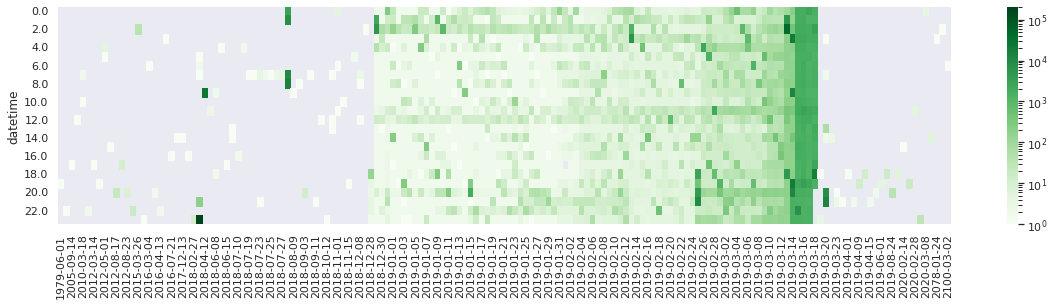

In [ ]:
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize

sns.set(rc = {'figure.figsize':(20,4)})
sns.heatmap(log_by_day_hour, cmap="Greens",norm=LogNorm())


In [ ]:
# 3d create a streamgraph (see slides day 1) showing source type counts for the time period '2018-12-28' to '2019-03-19' 
# hint: use stackplot() from matplotlib, see https://www.python-graph-gallery.com/streamchart-basic-matplotlib

In [ ]:
# From 3b we have:
#
# FILE       294708
# REG        283847
# EVT        111102
# LOG          1302
# WEBHIST      1127
# LNK            92
# PE             61
# OLECF          41
# AMCACHE         8
#
# We use the stackplot() function of matplotlib. For more details see:
#
# https://www.python-graph-gallery.com/streamchart-basic-matplotlib
#

dfc = df[["date","source"]].value_counts().reset_index(name='counts')
dfc['date'] = pd.to_datetime(dfc['date'],errors='coerce')
dfc = dfc.dropna()
start_date = '2018-12-28'
end_date   = '2019-03-19'
dfc = dfc[(dfc['date'] > start_date) & (dfc['date'] <= end_date)]
dfc


,date,source,counts
9,2019-02-25,EVT,16413
15,2019-02-13,REG,5724
17,2018-12-29,EVT,4340
18,2019-02-28,EVT,3524
19,2018-12-29,REG,3320
...,...,...,...
345,2019-01-28,REG,1
349,2019-02-07,REG,1
354,2019-02-10,REG,1
355,2019-02-11,WEBHIST,1


In [ ]:
counts_per_day_per_source = pd.pivot_table( dfc, fill_value=0.0, columns=[dfc.date], index=[dfc.source], values = 'counts', aggfunc="sum")
counts_per_day_per_source

date,2018-12-29,2018-12-30,2018-12-31,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,...,2019-02-20,2019-02-21,2019-02-22,2019-02-23,2019-02-24,2019-02-25,2019-02-26,2019-02-27,2019-02-28,2019-03-01
source,,,,,,,,,,,,,,,,,,,,,
AMCACHE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
EVT,4340,145,450,509,115,414,163,419,416,458,...,942,235,915,303,398,16413,2871,2698,3524,2117
FILE,52,4,2,0,0,0,1,0,0,0,...,1,0,0,11,0,127,3,8,5,2
LNK,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,17,1,0,0,0
LOG,22,0,0,0,0,0,0,0,0,0,...,0,0,5,4,0,106,15,6,2,0
OLECF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,9,0,0,0,0
REG,3320,4,0,12,0,1,9,2,1,2,...,12,5,3,28,1,997,51,109,48,10
WEBHIST,0,0,0,0,0,0,0,0,0,0,...,18,1,15,0,0,256,2,0,19,2


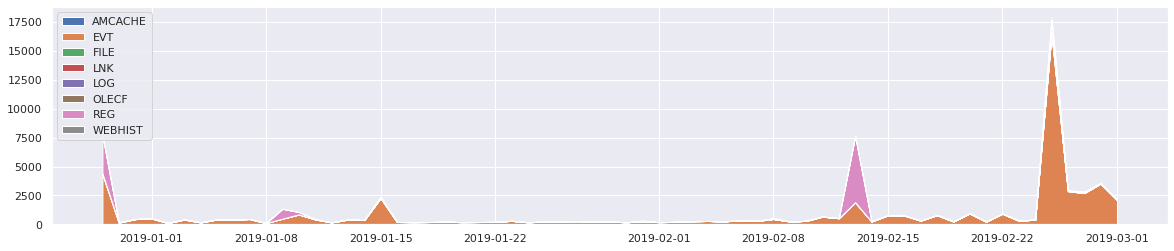

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.stackplot(counts_per_day_per_source.columns, counts_per_day_per_source.values, labels = counts_per_day_per_source.index,)
ax.legend(loc='upper left')
plt.show()



In [ ]:
# the large values of some source types (EVTand REG) prevent the other sources types from being visible.
# using the log function we can normalize the counts using log()
#

dfc['normalized'] = np.log(dfc.counts)
dfc

,date,source,counts,normalized
9,2019-02-25,EVT,16413,9.705829
15,2019-02-13,REG,5724,8.652423
17,2018-12-29,EVT,4340,8.375630
18,2019-02-28,EVT,3524,8.167352
19,2018-12-29,REG,3320,8.107720
...,...,...,...,...
345,2019-01-28,REG,1,0.000000
349,2019-02-07,REG,1,0.000000
354,2019-02-10,REG,1,0.000000
355,2019-02-11,WEBHIST,1,0.000000


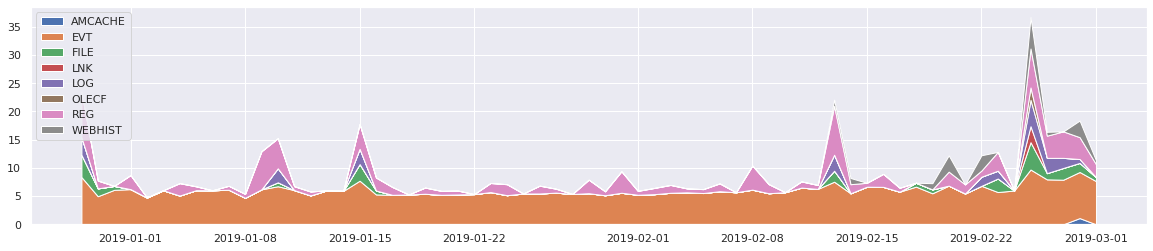

In [ ]:
fig, ax = plt.subplots()
counts_per_day_per_source_log = pd.pivot_table( dfc, fill_value=0.0, columns=[dfc.date], index=[dfc.source], values = 'normalized', aggfunc="sum")
ax.stackplot(counts_per_day_per_source_log.columns, counts_per_day_per_source_log.values, labels = counts_per_day_per_source_log.index)
ax.legend(loc='upper left')
plt.show()


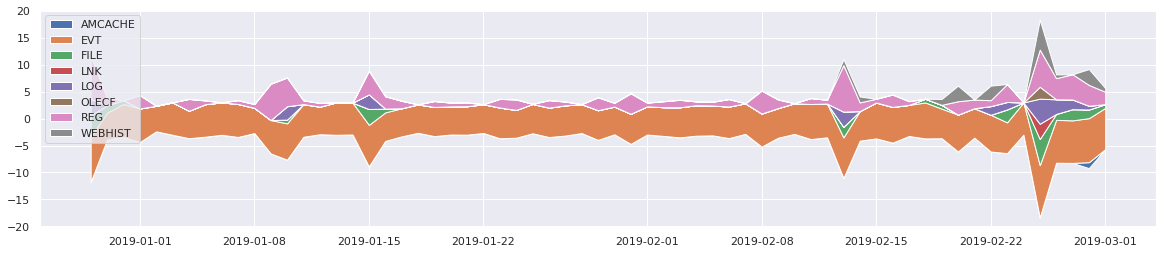

In [ ]:
# use the baseline="sym" in stackplot to get a symmetrical stackplot around the baseline
#
fig, ax = plt.subplots()
counts_per_day_per_source_log = pd.pivot_table( dfc, fill_value=0.0, columns=[dfc.date], index=[dfc.source], values = 'normalized', aggfunc="sum")
ax.stackplot(counts_per_day_per_source_log.columns, counts_per_day_per_source_log.values, labels = counts_per_day_per_source_log.index,baseline="sym")
ax.legend(loc='upper left')
plt.show()

## 4 Analyse the M57 Patents scenario disk images from Digital Corpora

In [ ]:
# The M57 Patents scenario is described here https://digitalcorpora.org/corpora/scenarios/m57-patents-scenario
#
# Download the redacted drive images from Charlie, Pat, Jo and Terry (take the last ones):
#
# https://digitalcorpora.s3.amazonaws.com/corpora/scenarios/2009-m57-patents/drives-redacted/charlie-2009-12-11.E01
# https://digitalcorpora.s3.amazonaws.com/corpora/scenarios/2009-m57-patents/drives-redacted/jo-2009-12-11-002.E01
# https://digitalcorpora.s3.amazonaws.com/corpora/scenarios/2009-m57-patents/drives-redacted/pat-2009-12-11.E01
# 
# Create a WinXP plaso file with a single log2timeline.py command. Save the plaso file for later use
#
# Questions
#
# 1 which users have accounts on which machines?
#
# Create a subfolder images where the 4 e01 files are stored
#
#!cd
#!mkdir images
#!cd images
!curl -o charlie-2009-12-11.E01 https://digitalcorpora.s3.amazonaws.com/corpora/scenarios/2009-m57-patents/drives-redacted/charlie-2009-12-11.E01
!curl -o jo-2009-12-11-002.E01 https://digitalcorpora.s3.amazonaws.com/corpora/scenarios/2009-m57-patents/drives-redacted/jo-2009-12-11-002.E01
!curl -o pat-2009-12-11.E01 https://digitalcorpora.s3.amazonaws.com/corpora/scenarios/2009-m57-patents/drives-redacted/pat-2009-12-11.E01




  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3694M  100 3694M    0     0  20.3M      0  0:03:01  0:03:01 --:--:-- 25.5M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5664M  100 5664M    0     0  23.5M      0  0:04:00  0:04:00 --:--:-- 23.3M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5861M  100 5861M    0     0  23.1M      0  0:04:13  0:04:13 --:--:-- 26.7M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9.8G  100  9.8G    0     0  25.0M      0  0:06:43  0:06:43 --:--:-- 27.5M


In [ ]:
# start with processing pat
#
!log2timeline.py -f filter_windows.txt --parsers winxp --storage_file pat.plaso images/pat-2009-12-11.E01 --status_view none 
!psort.py --status_view none -o dynamic --additional_fields "data_type, drive_type, drive_serial_number,droid_file_identifier"  -w pat.csv pat.plaso
#
# add a column to the file indicating that these lines are from pat and store the results in m57patents.csv
# first take the header and add the column name: computer
#
!cat pat.csv | head -n 1 |  sed 's/$/,computer/' > m57patents.csv
!cat pat.csv | tail -n +2 |  sed 's/$/,pat/' >> m57patents.csv
!wc m57patents.csv

2021-08-19 15:30:21,430 [INFO] (MainProcess) PID:10694 <data_location> Determined data location: /usr/share/plaso
2021-08-19 15:30:21,446 [INFO] (MainProcess) PID:10694 <artifact_definitions> Determined artifact definitions path: /usr/share/artifacts
Checking availability and versions of dependencies.
[OK]


Source path		: /content/images/pat-2009-12-11.E01
Source type		: storage media image
Filter file		: /usr/share/plaso/filter_windows.txt
Processing time		: 00:00:00

Processing started.
Processing completed.

2021-08-19 15:32:06,103 [INFO] (MainProcess) PID:10732 <data_location> Determined data location: /usr/share/plaso
Processing completed.
  186253  3750305 67289290 m57patents.csv


In [ ]:
# then with processing charlie
#
!log2timeline.py -f filter_windows.txt --parsers winxp --storage_file charlie.plaso images/charlie-2009-12-11.E01 --status_view none 
!psort.py --status_view none -o dynamic --additional_fields "data_type, drive_type, drive_serial_number,droid_file_identifier"  -w charlie.csv charlie.plaso
#
# add a column to the file indicating that these lines are from pat and store the results in m57patents.csv
#
!cat charlie.csv | tail -n +2 |  sed 's/$/,charlie/' >> m57patents.csv
!wc m57patents.csv

2021-08-19 15:34:57,827 [INFO] (MainProcess) PID:10776 <data_location> Determined data location: /usr/share/plaso
2021-08-19 15:34:57,842 [INFO] (MainProcess) PID:10776 <artifact_definitions> Determined artifact definitions path: /usr/share/artifacts
Checking availability and versions of dependencies.
[OK]


Source path		: /content/images/charlie-2009-12-11.E01
Source type		: storage media image
Filter file		: /usr/share/plaso/filter_windows.txt
Processing time		: 00:00:00

Processing started.
Processing completed.

2021-08-19 15:36:33,361 [INFO] (MainProcess) PID:10812 <data_location> Determined data location: /usr/share/plaso
Processing completed.
   349152   6389478 121003399 m57patents.csv


In [ ]:
# then with processing jo
#
!log2timeline.py -f filter_windows.txt --parsers winxp --storage_file jo.plaso images/jo-2009-12-11-002.E01 --status_view none 
!psort.py --status_view none -o dynamic --additional_fields "data_type, drive_type, drive_serial_number,droid_file_identifier"  -w jo.csv jo.plaso
#
# add a column to the file indicating that these lines are from pat and store the results in m57patents.csv
#
!cat jo.csv | tail -n +2 |  sed 's/$/,jo/' >> m57patents.csv
!wc m57patents.csv

2021-08-19 16:10:20,171 [INFO] (MainProcess) PID:10864 <data_location> Determined data location: /usr/share/plaso
2021-08-19 16:10:20,187 [INFO] (MainProcess) PID:10864 <artifact_definitions> Determined artifact definitions path: /usr/share/artifacts
Checking availability and versions of dependencies.
[OK]


Source path		: /content/images/jo-2009-12-11-002.E01
Source type		: storage media image
Filter file		: /usr/share/plaso/filter_windows.txt
Processing time		: 00:00:00

Processing started.
Processing completed.

2021-08-19 16:11:51,591 [INFO] (MainProcess) PID:10898 <data_location> Determined data location: /usr/share/plaso
Processing completed.
   497557   8790776 170621367 m57patents.csv


In [ ]:
import pandas as pd
import numpy as np
import datetime as dt

mydateparser = lambda x: dt.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%f%z') if x != '0000-00-00T00:00:00.000000+00:00'  else ''
df_m57 = pd.read_csv(
    "m57patents.csv", 
    dtype={'message':str},
    parse_dates = ['datetime'],
    date_parser=mydateparser,
    index_col='datetime'
    )   

In [ ]:
df_m57.head()

,timestamp_desc,source,source_long,message,parser,display_name,tag,data_type,drive_type,drive_serial_number,droid_file_identifier,computer
datetime,,,,,,,,,,,,
NaT,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: Visited: Administrator@about:Home Nu...,msiecf,NTFS:\Documents and Settings\Administrator\Loc...,-,msiecf:url,-,-,-,pat
NaT,File Last Modification Time,REG,AppCompatCache Registry Entry,[HKEY_LOCAL_MACHINE\System\ControlSet001\Contr...,winreg/appcompatcache,NTFS:\WINDOWS\system32\config\system,-,windows:registry:appcompatcache,-,-,-,pat
NaT,File Last Modification Time,REG,AppCompatCache Registry Entry,[HKEY_LOCAL_MACHINE\System\ControlSet002\Contr...,winreg/appcompatcache,NTFS:\WINDOWS\system32\config\system,-,windows:registry:appcompatcache,-,-,-,pat
NaT,File Last Modification Time,REG,AppCompatCache Registry Entry,[HKEY_LOCAL_MACHINE\System\ControlSet001\Contr...,winreg/appcompatcache,NTFS:\WINDOWS\system32\config\system,-,windows:registry:appcompatcache,-,-,-,pat
NaT,File Last Modification Time,REG,AppCompatCache Registry Entry,[HKEY_LOCAL_MACHINE\System\ControlSet002\Contr...,winreg/appcompatcache,NTFS:\WINDOWS\system32\config\system,-,windows:registry:appcompatcache,-,-,-,pat


In [ ]:
df_m57.describe

<bound method NDFrame.describe of                                         timestamp_desc  ... computer
datetime                                                ...         
NaT                                    Expiration Time  ...      pat
NaT                        File Last Modification Time  ...      pat
NaT                        File Last Modification Time  ...      pat
NaT                        File Last Modification Time  ...      pat
NaT                        File Last Modification Time  ...      pat
...                                                ...  ...      ...
2038-01-18 00:00:00+00:00              Expiration Time  ...       jo
2039-11-20 18:36:32+00:00              Expiration Time  ...       jo
2039-11-20 19:33:10+00:00              Expiration Time  ...       jo
2039-11-25 03:40:02+00:00              Expiration Time  ...       jo
2039-11-25 03:40:06+00:00              Expiration Time  ...       jo

[497556 rows x 12 columns]>

In [ ]:
df_m57_clean = df_m57.loc[df_m57.index.notnull()]
df_m57_clean

,timestamp_desc,source,source_long,message,parser,display_name,tag,data_type,drive_type,drive_serial_number,droid_file_identifier,computer
datetime,,,,,,,,,,,,
1997-07-26 05:00:00+00:00,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: http://www.stocksonlinebrokers.com/ ...,msiecf,NTFS:\Documents and Settings\Pat\Local Setting...,-,msiecf:url,-,-,-,pat
1997-07-26 05:00:00+00:00,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: http://searchportal.information.com/...,msiecf,NTFS:\Documents and Settings\Pat\Local Setting...,-,msiecf:url,-,-,-,pat
1997-07-26 05:00:00+00:00,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: http://searchportal.information.com/...,msiecf,NTFS:\Documents and Settings\Pat\Local Setting...,-,msiecf:url,-,-,-,pat
2000-01-01 00:00:00+00:00,Content Modification Time,WEBHIST,MSIE Cache File URL record,Location: http://static.ak.fbcdn.net/rsrc.php/...,msiecf,NTFS:\Documents and Settings\Pat\Local Setting...,-,msiecf:url,-,-,-,pat
2000-01-01 00:00:00+00:00,Content Modification Time,WEBHIST,MSIE Cache File URL record,Location: http://static.ak.fbcdn.net/rsrc.php/...,msiecf,NTFS:\Documents and Settings\Pat\Local Setting...,-,msiecf:url,-,-,-,pat
...,...,...,...,...,...,...,...,...,...,...,...,...
2038-01-18 00:00:00+00:00,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: Cookie:administrator@mozilla.com/ Nu...,msiecf,NTFS:\Documents and Settings\Administrator\Coo...,-,msiecf:url,-,-,-,jo
2039-11-20 18:36:32+00:00,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: Cookie:administrator@microsoft.com/ ...,msiecf,NTFS:\Documents and Settings\Administrator\Coo...,-,msiecf:url,-,-,-,jo
2039-11-20 19:33:10+00:00,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: Cookie:administrator@interclick.com/...,msiecf,NTFS:\Documents and Settings\Administrator\Coo...,-,msiecf:url,-,-,-,jo


In [ ]:
df_m57_clean = df_m57_clean[df_m57_clean.index < '1-1-2021']

# use the following restriction to zoom in
# df_m57_clean = df_m57_clean[(df_m57_clean.index > '29-10-2009') & (df_m57_clean.index < '18-12-2009')]

In [ ]:
df_m57_clean

,timestamp_desc,source,source_long,message,parser,display_name,tag,data_type,drive_type,drive_serial_number,droid_file_identifier,computer
datetime,,,,,,,,,,,,
2009-10-29 07:45:33+00:00,File Last Modification Time,REG,AppCompatCache Registry Entry,[HKEY_LOCAL_MACHINE\System\ControlSet001\Contr...,winreg/appcompatcache,NTFS:\WINDOWS\system32\config\system,-,windows:registry:appcompatcache,-,-,-,pat
2009-10-29 07:45:33+00:00,File Last Modification Time,REG,AppCompatCache Registry Entry,[HKEY_LOCAL_MACHINE\System\ControlSet002\Contr...,winreg/appcompatcache,NTFS:\WINDOWS\system32\config\system,-,windows:registry:appcompatcache,-,-,-,pat
2009-10-29 15:16:30+00:00,Content Modification Time,WEBHIST,MSIE Cache File URL record,Location: http://speed.pointroll.com/PointRoll...,msiecf,NTFS:\Documents and Settings\Pat\Local Setting...,-,msiecf:url,-,-,-,pat
2009-10-29 16:05:03+00:00,Content Modification Time,WEBHIST,MSIE Cache File URL record,Location: http://www.orientaltrading.com/corem...,msiecf,NTFS:\Documents and Settings\Pat\Local Setting...,-,msiecf:url,-,-,-,pat
2009-10-29 16:05:03+00:00,Content Modification Time,WEBHIST,MSIE Cache File URL record,Location: http://www.orientaltrading.com/corem...,msiecf,NTFS:\Documents and Settings\Pat\Local Setting...,-,msiecf:url,-,-,-,pat
...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-16 19:55:40+00:00,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: :2009112020091121: Administrator@htt...,msiecf,NTFS:\Documents and Settings\Administrator\Loc...,-,msiecf:url,-,-,-,jo
2009-12-16 19:55:40+00:00,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: Visited: Administrator@http://www.up...,msiecf,NTFS:\Documents and Settings\Administrator\Loc...,-,msiecf:url,-,-,-,jo
2009-12-16 19:56:14+00:00,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: :2009112020091121: Administrator@htt...,msiecf,NTFS:\Documents and Settings\Administrator\Loc...,-,msiecf:url,-,-,-,jo


In [ ]:
import matplotlib.pyplot as plt

# etc. create a pivot summing the number of events per day per computer and then plot that. Also see exercise 

df_m57bydaycomp = pd.pivot_table( df_m57_clean, fill_value=0.0, columns=[df_m57_clean.index.date], index=[df_m57_clean.computer], aggfunc="count")['source']

In [ ]:
df_m57bydaycomp

,2009-10-29,2009-10-30,2009-11-01,2009-11-02,2009-11-03,2009-11-04,2009-11-05,2009-11-06,2009-11-07,2009-11-08,2009-11-09,2009-11-10,2009-11-11,2009-11-12,2009-11-13,2009-11-14,2009-11-15,2009-11-16,2009-11-17,2009-11-18,2009-11-19,2009-11-20,2009-11-21,2009-11-22,2009-11-23,2009-11-24,2009-11-25,2009-11-26,2009-11-27,2009-11-28,2009-11-29,2009-11-30,2009-12-01,2009-12-02,2009-12-03,2009-12-04,2009-12-05,2009-12-06,2009-12-07,2009-12-08,2009-12-09,2009-12-10,2009-12-11,2009-12-12,2009-12-13,2009-12-14,2009-12-15,2009-12-16,2009-12-17
computer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
charlie,2,1,0,2,3,3,6,4,1,13007,37627,8989,1195,106,1386,4,5,197,562,161,3043,588,44,6,101,406,160,8,0,0,0,854,129,144,164,395,9440,9103,13231,15013,34458,7181,4060,1,0,0,0,0,0
jo,2,1,0,2,3,2,2,2,0,7,0,1,7,7,28,2,0,1,4,5,8,61898,174,3,492,3031,1386,1,113,1,0,1967,87,160,192,164,144,0,64,203,35295,29219,12623,0,0,0,0,76,0
pat,10,29,3,6,59,33,23,17,8,12883,40394,6367,1150,253,1138,54,5,9470,932,1750,1878,1068,136,10,3076,173,508,4,22,7,10,1762,128,579,307,388,397,1672,1373,3500,68246,14092,6972,64,11,5,4,14,5


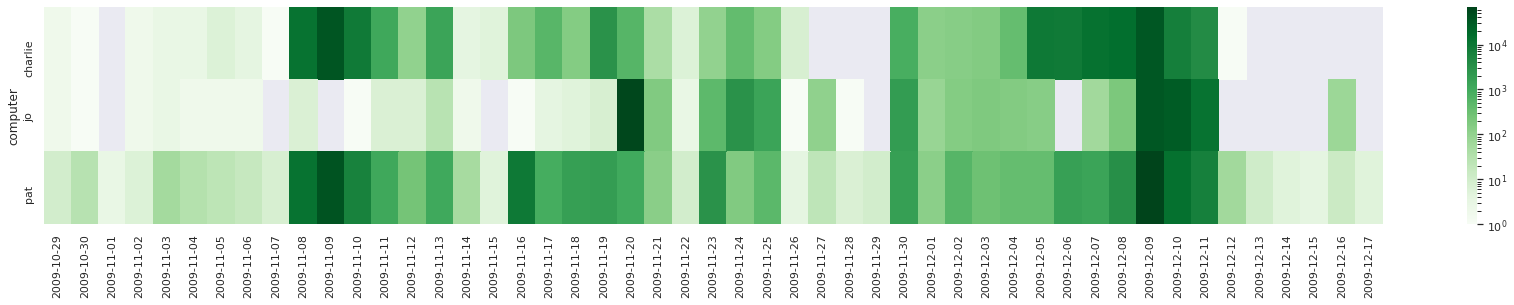

In [ ]:
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize

sns.set(rc = {'figure.figsize':(30,4)})
sns.heatmap(df_m57bydaycomp, cmap="Greens",norm=LogNorm())

In [ ]:
# can you find out what happened on the busy days?